## Student Performance Indicator

Life Cycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to Perform
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Choosing the Best Model

### 1. Problem Statement 

This Project is to check whether student performance is affected by the variables such as Gender, parental education, ethinicity, Lunch and test preparation course.

### 2. Data Collection 

Data Source - "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977".

We will create a folder and store the data there.

### 2.1 Import data and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

### Import the data as pandas dataframe

In [2]:
url = "https://raw.githubusercontent.com/krishnaik06/mlproject/main/notebook/data/stud.csv"

In [3]:
data = pd.read_csv(url)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Make a folder and save the data

In [4]:
os.getcwd()

'D:\\Projects Series\\MLProjects\\notebook'

In [5]:
## Create the data directory

try:
    os.mkdir("data")
except FileExistsError:
    pass    

In [6]:
data.to_csv("data/student_performance.csv", index=False)

### Load the data

In [7]:
df = pd.read_csv("data/student_performance.csv")

### Show Top 5 Records 

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [9]:
df.shape

(1000, 8)

There are 1000 records with 8 columns

### 2.2 Dataset Information

* gender - sex of the student (Male / Female)
* race_ethnicity - ethnicity of students - (Group A, B, C, D, E)
* parental_level_of education - parents's education level
* lunch - having lunch before test (standard or free / reduced)
* test_preparation_course - complete or not completed before the test
* math_score 
* reading_score
* wrtiting_score

### 3. Data Checks to perform

* Check Missing Values
* Check Duplicates
* Check Data Type
* Check the number of unique values of each column
* Check statistics of the data
* Check various categories present in different categorical columns

### 3.1 Check Missing Values

In [10]:
df.isnull().any()

gender                         False
race_ethnicity                 False
parental_level_of_education    False
lunch                          False
test_preparation_course        False
math_score                     False
reading_score                  False
writing_score                  False
dtype: bool

In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no Missing Values in the dataset

### 3.2 Check for Duplicates

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
df.duplicated().sum()

0

There are no Duplicated Values in the dataset

### 3.3 Check Data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are categorical as well as numerical columns in the dataset

### 3.4 Check the number of unique values of each column

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

There are unique values in the dataset

### 3.5 Check statistics of the data

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights : - 

* The results from the numerical columns shows mean of all the columns are close to each other between 66 - 69.16
* The Standard deviation are close to each other between 14.6 - 15.19
* The mininum score for math is 0, while for reading and writing it significantly higher such as 17 and 10.

### 3.6 Check various categories present in different categorical columns

In [17]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.7 Exploring the columns

In [18]:
print("Categories under Gender : ", end= " ")
print(df['gender'].unique())


print("Categories under race_ethnicity : ", end = " ")
print(df['race_ethnicity'].unique())


print("Categories under parental_level_of_education : ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories under lunch: ", end=" ")
print(df['lunch'].unique())


print("Categories under test_preparation_course : ", end= " ")
print(df['test_preparation_course'].unique())


print("Categories under math_score : ", end = " ")
print(df['math_score'].unique())


print("Categories under reading_score : ", end=" ")
print(df['reading_score'].unique())


print("Categories under writing_score : ", end=" ")
print(df['writing_score'].unique())

Categories under Gender :  ['female' 'male']
Categories under race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories under parental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories under lunch:  ['standard' 'free/reduced']
Categories under test_preparation_course :  ['none' 'completed']
Categories under math_score :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories under reading_score :  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  6

### Define numerical & Categorical columns

In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## print columns
print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3.8 Adding few other columns

In [21]:
## Creating columns like total_score and average

df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] ==100]['average'].count()
math_full = df[df['math_score'] ==100]['average'].count()

print(f"Number of student with full marks in maths: {math_full}")
print(f"Number of student with full marks in writing: {writing_full}")
print(f"Number of student with full marks in reading: {reading_full}")

Number of student with full marks in maths: 7
Number of student with full marks in writing: 14
Number of student with full marks in reading: 17


In [24]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


### Insights

* From the above values we get student have performed worst in Maths
* Best performance is for reading

### 4. Exploring Data


### 4.1 Visualize average score distribution to make some conclusion

* Histogram
* Kernel distribution function (KDE)

### 4.1.1 Histogram & KDE

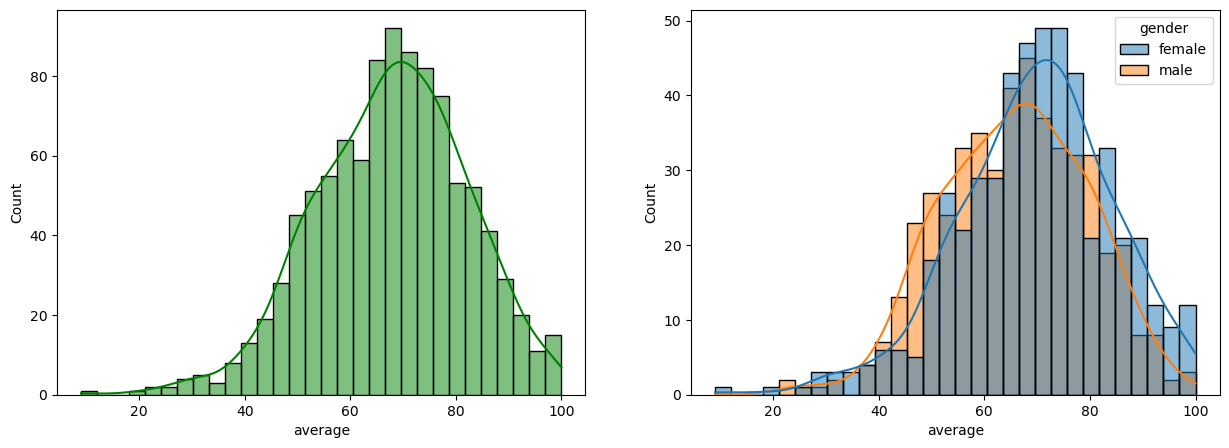

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(x='average', bins=30, kde=True, data=df, color='g')
plt.subplot(122)
sns.histplot(x='average', bins=30, kde=True, hue='gender', data=df);

### Insights

Female students tend to perform better than male students

<AxesSubplot:xlabel='average', ylabel='Count'>

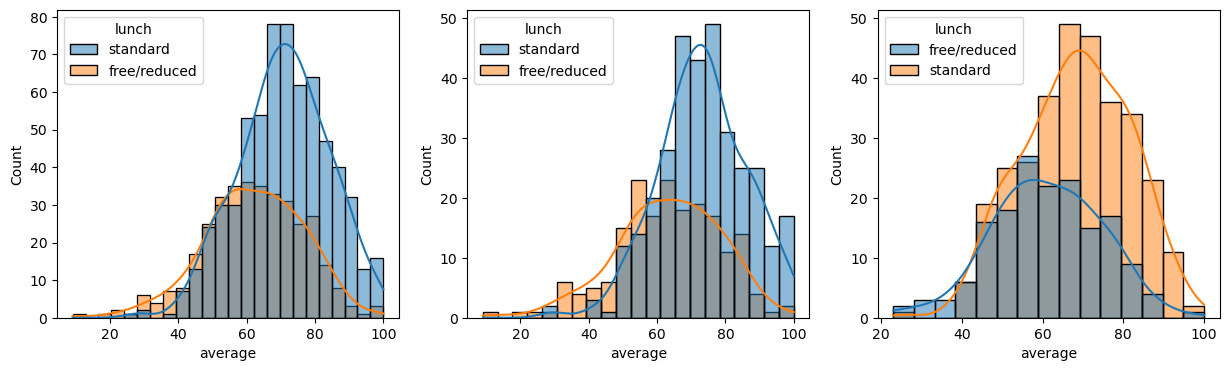

In [26]:
fig, axs = plt.subplots(1, figsize=(15, 4))
plt.subplot(131)
sns.histplot(data=df, x='average', hue='lunch', kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

### Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well for Male and Female

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot:xlabel='average', ylabel='Count'>

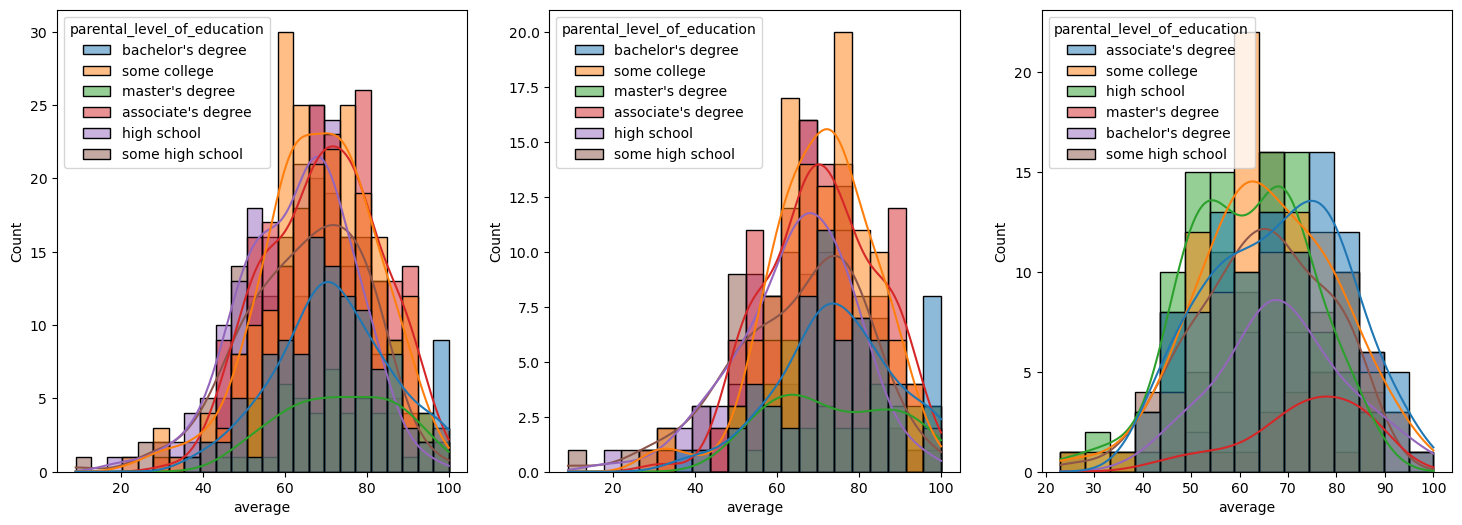

In [28]:
fig, axs = plt.subplots(1, figsize=(18, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', hue='parental_level_of_education', kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

<AxesSubplot:xlabel='average', ylabel='Count'>

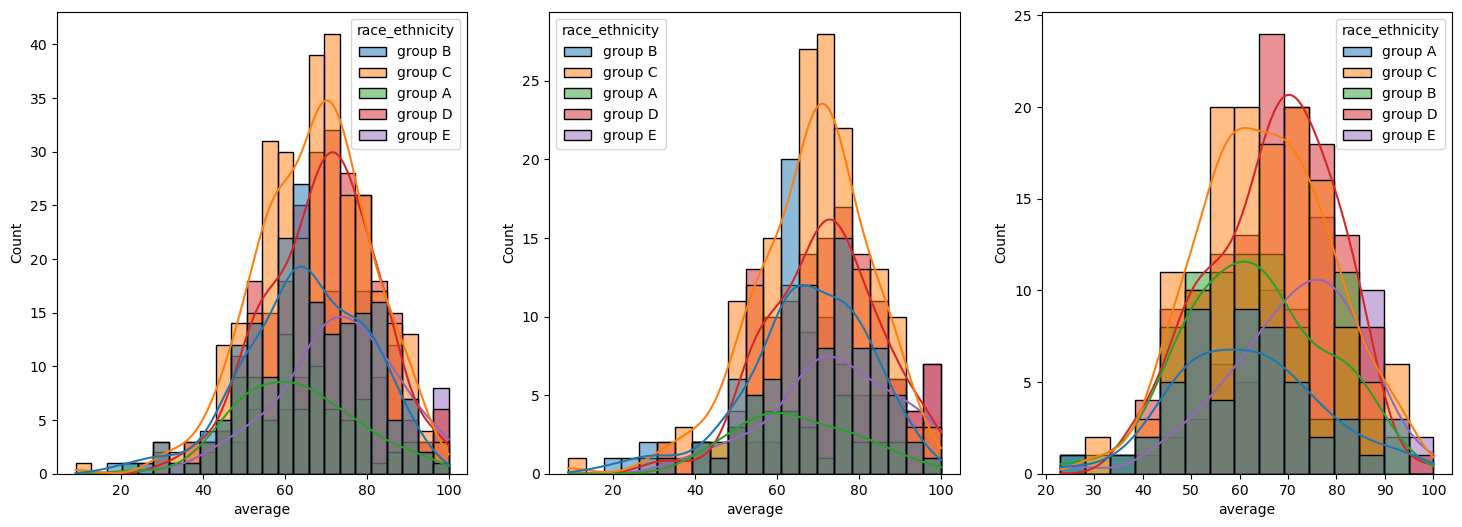

In [29]:
plt.subplots(1,3,figsize=(18,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')

### Insights

* Students of Group A, B and E tends to perform poor in exams
* Students of Group A, B and E tends to perform poor in exams despite male or female

### 4.2 Maximum score of students in all three subjects

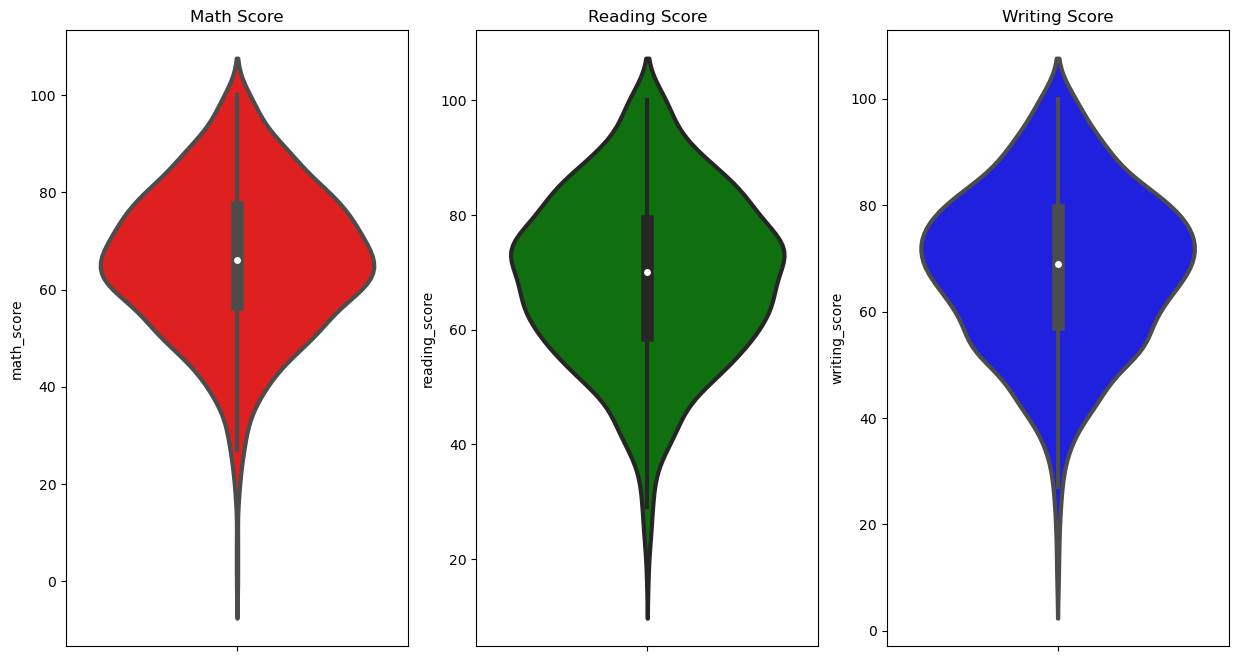

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights

* The Score range in Maths is 60 - 80
* The Score range of Reading & Writing is between 50 -80

### 4.3 Multivariate analysis using pieplot

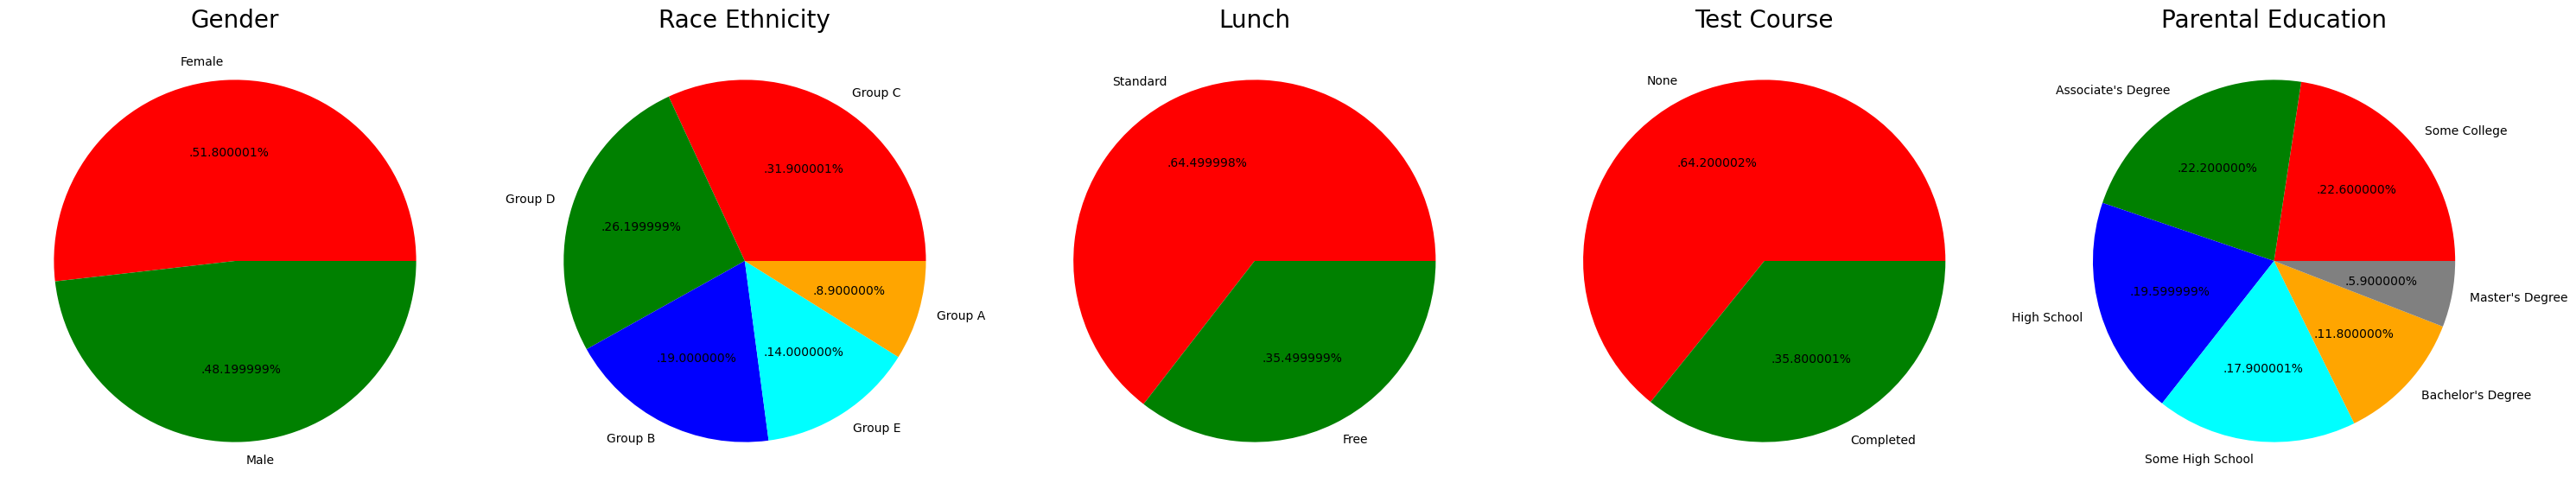

In [31]:
plt.subplots(1,5,figsize=(30,12))
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels='Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels='Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show();

### Insights

* Number of Male and Female students are almost equal
* Number of students in Group C are more than other other Groups
* Students who had Standard Lunch tends are more
* There are more students who havent taken any test preparation course
* 22.6% of parents have attended some college, followed by 22% with associate degrees 

### 4.4 Feature wise visualization

### 4.4.1 Gender Column

* How is distribution of Gender ?
* Is gender has any impact on student performance ?

### Univariate analysis

How is the distribution of Gender ?

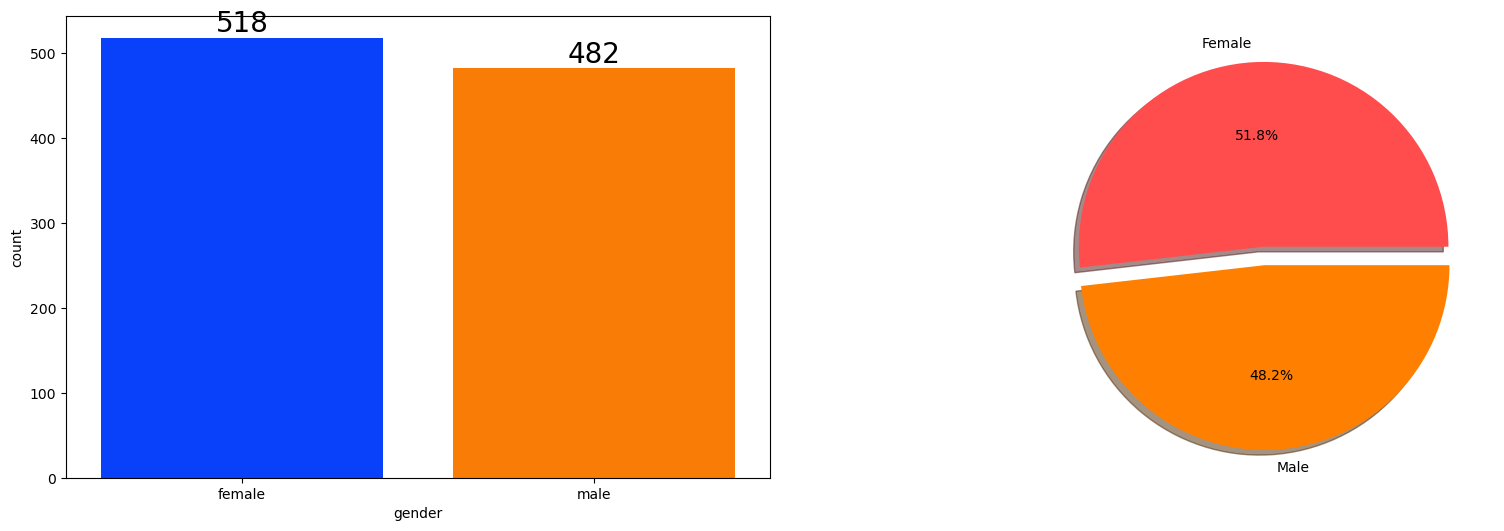

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot(x=df['gender'],data=df,palette ='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show();

### Insights

* Gender has a balanced data with 518 (51.8%) as Female & 482 (48.2%) as Male.

### Bivariate Analysis 

Is gender has any impact on student's performance

In [33]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


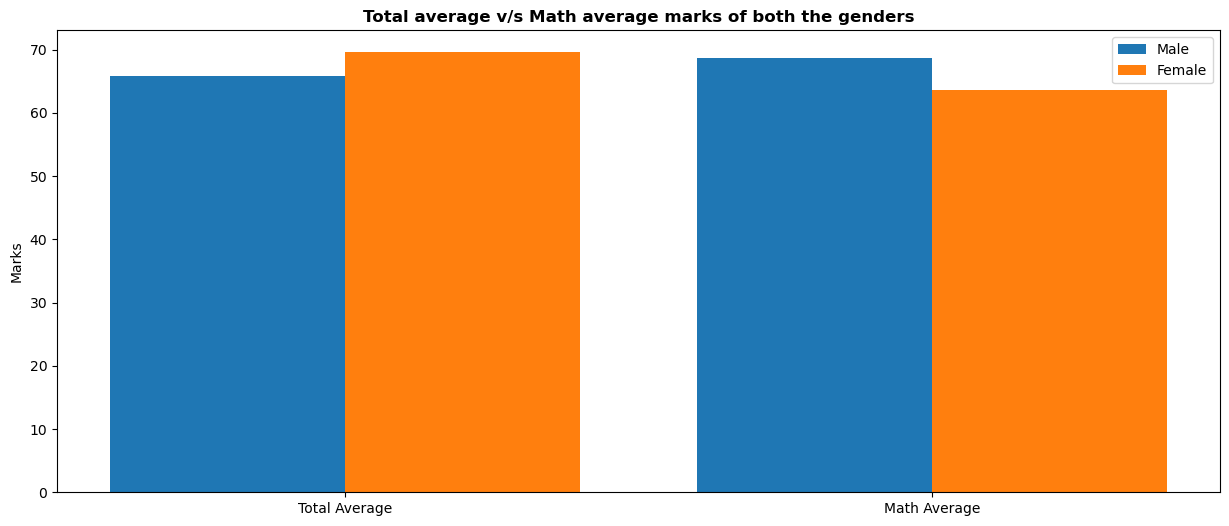

In [34]:
plt.figure(figsize=(15,6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show();


### Insights

* On an average female total average is more than male total average.
* Whereas in math male scored better than females.

### 4.4.2 Race / Ethinicity Column

* How is group wise distribution ?
* Is Race / Ethnicity has an impact on student performance ?

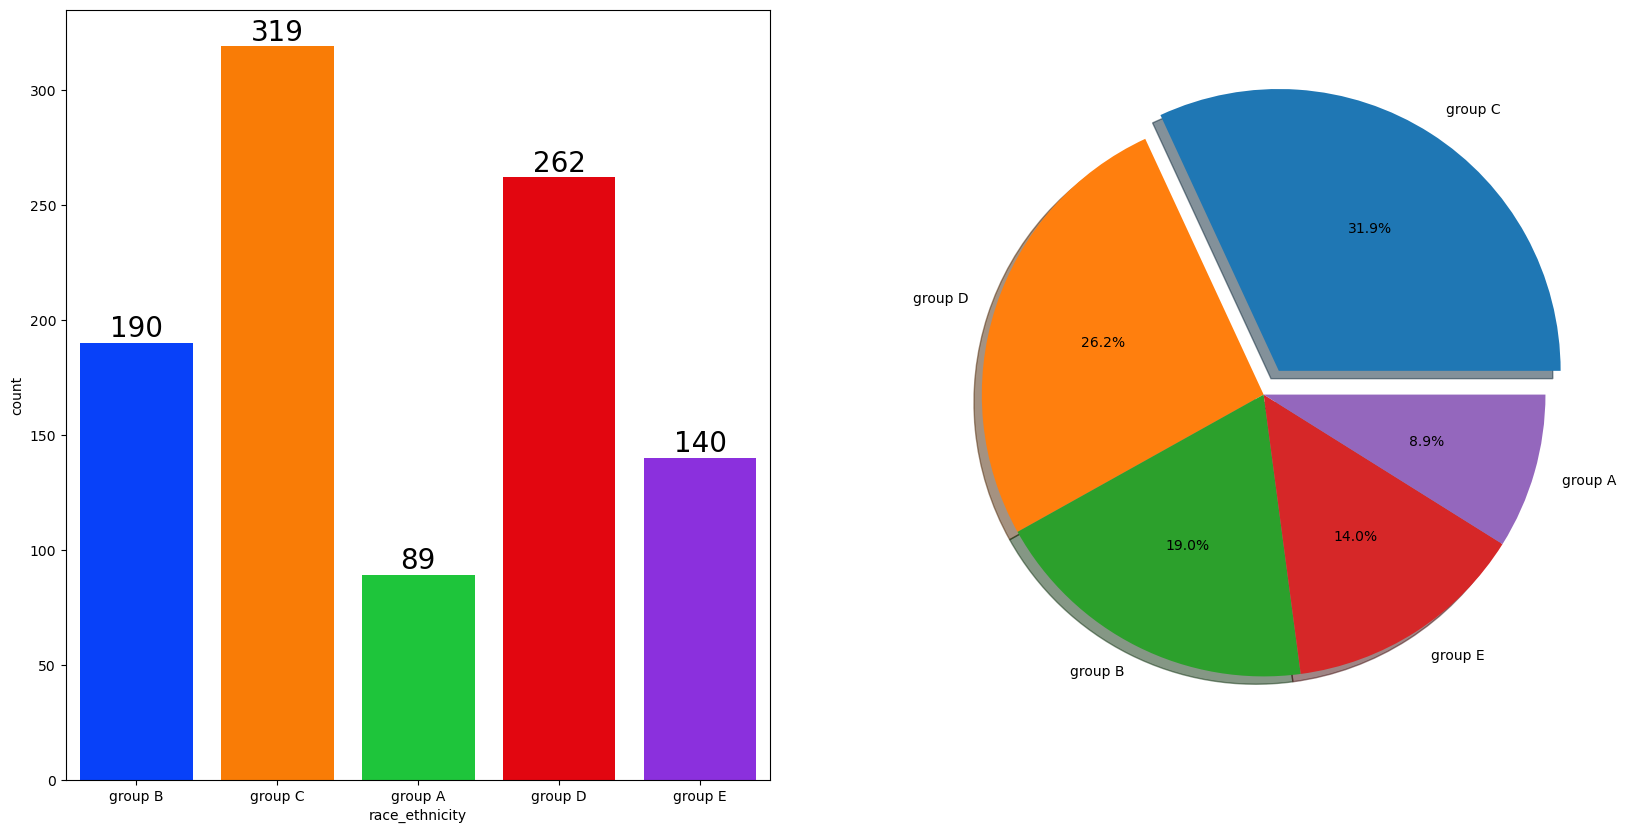

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show();

### Insights

* Most of the students belongs to Group C and Group D
* Lowest students are in Group A

### Bivariate Analysis

Is race/ethnicity plays any impact on student performance ? 

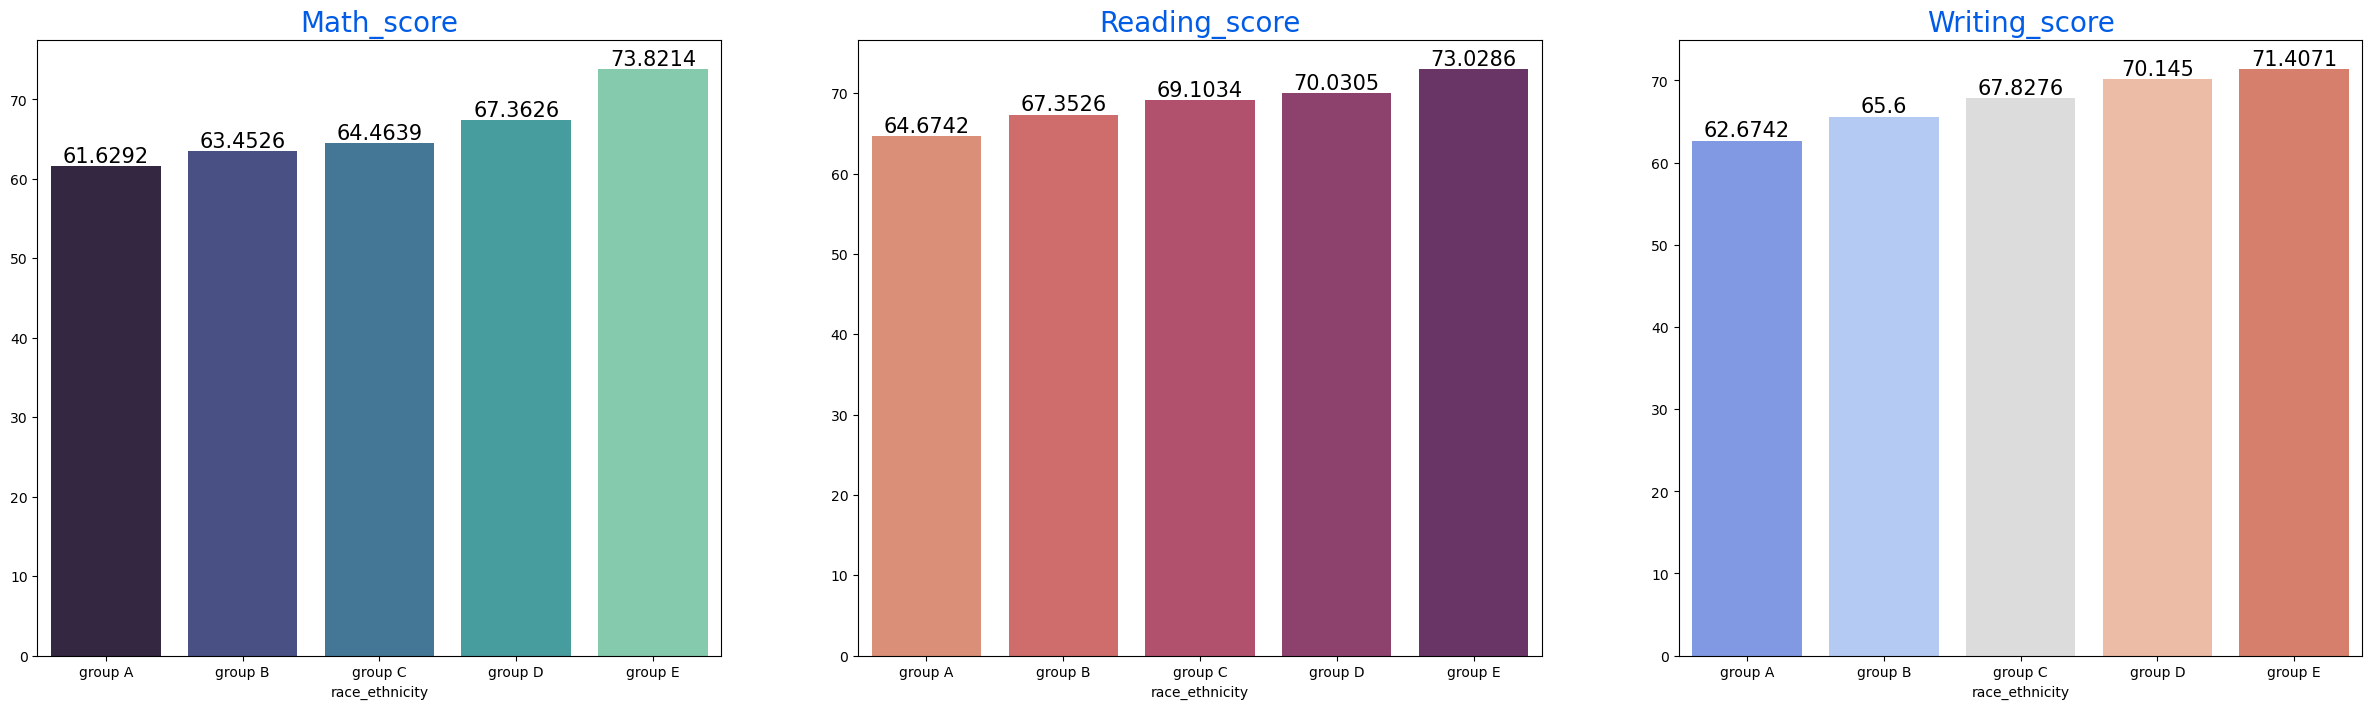

In [36]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(30,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights 

* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 Parental level of Education

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS 

What is educational background of student's parent ? 

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


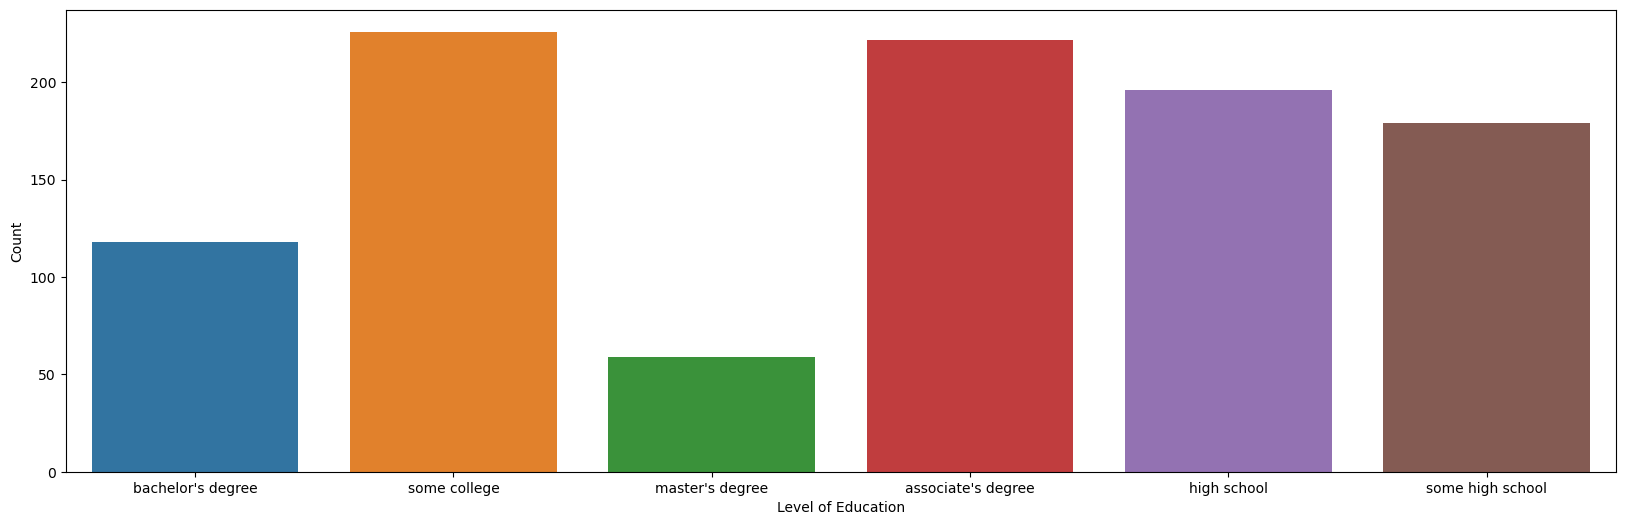

In [41]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['parental_level_of_education'])
plt.xlabel('Level of Education')
plt.ylabel('Count')
plt.show();

### Insights

Largest number of parents have attended some college

### Bivariate Analysis

Is parental education has any impact on student's performance ?

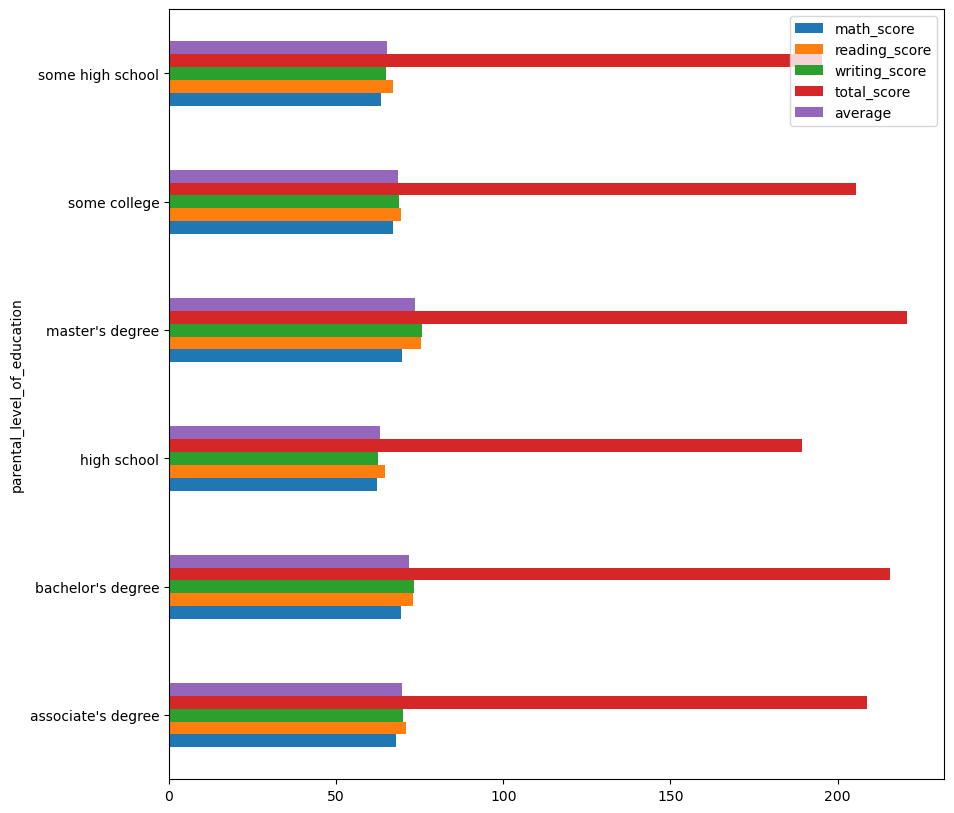

In [44]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend()
plt.show()

### Insights

Those parents who have attended Bachelors and Masters have their student with the High Marks. 

### 4.4.4 Lunch 

* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

### UNIVARIATE Analysis

* Which type of lunch is most common amoung students ?

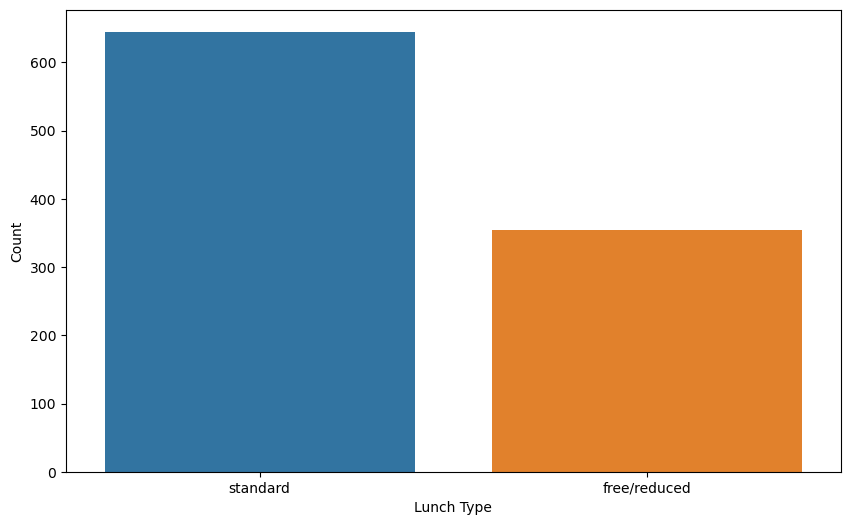

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['lunch'])
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.show();

### Insights 

* Students served standard lunch more than free/reduced lunch

### Bivariate Analysis 

* What is the effect of lunch type on test results?

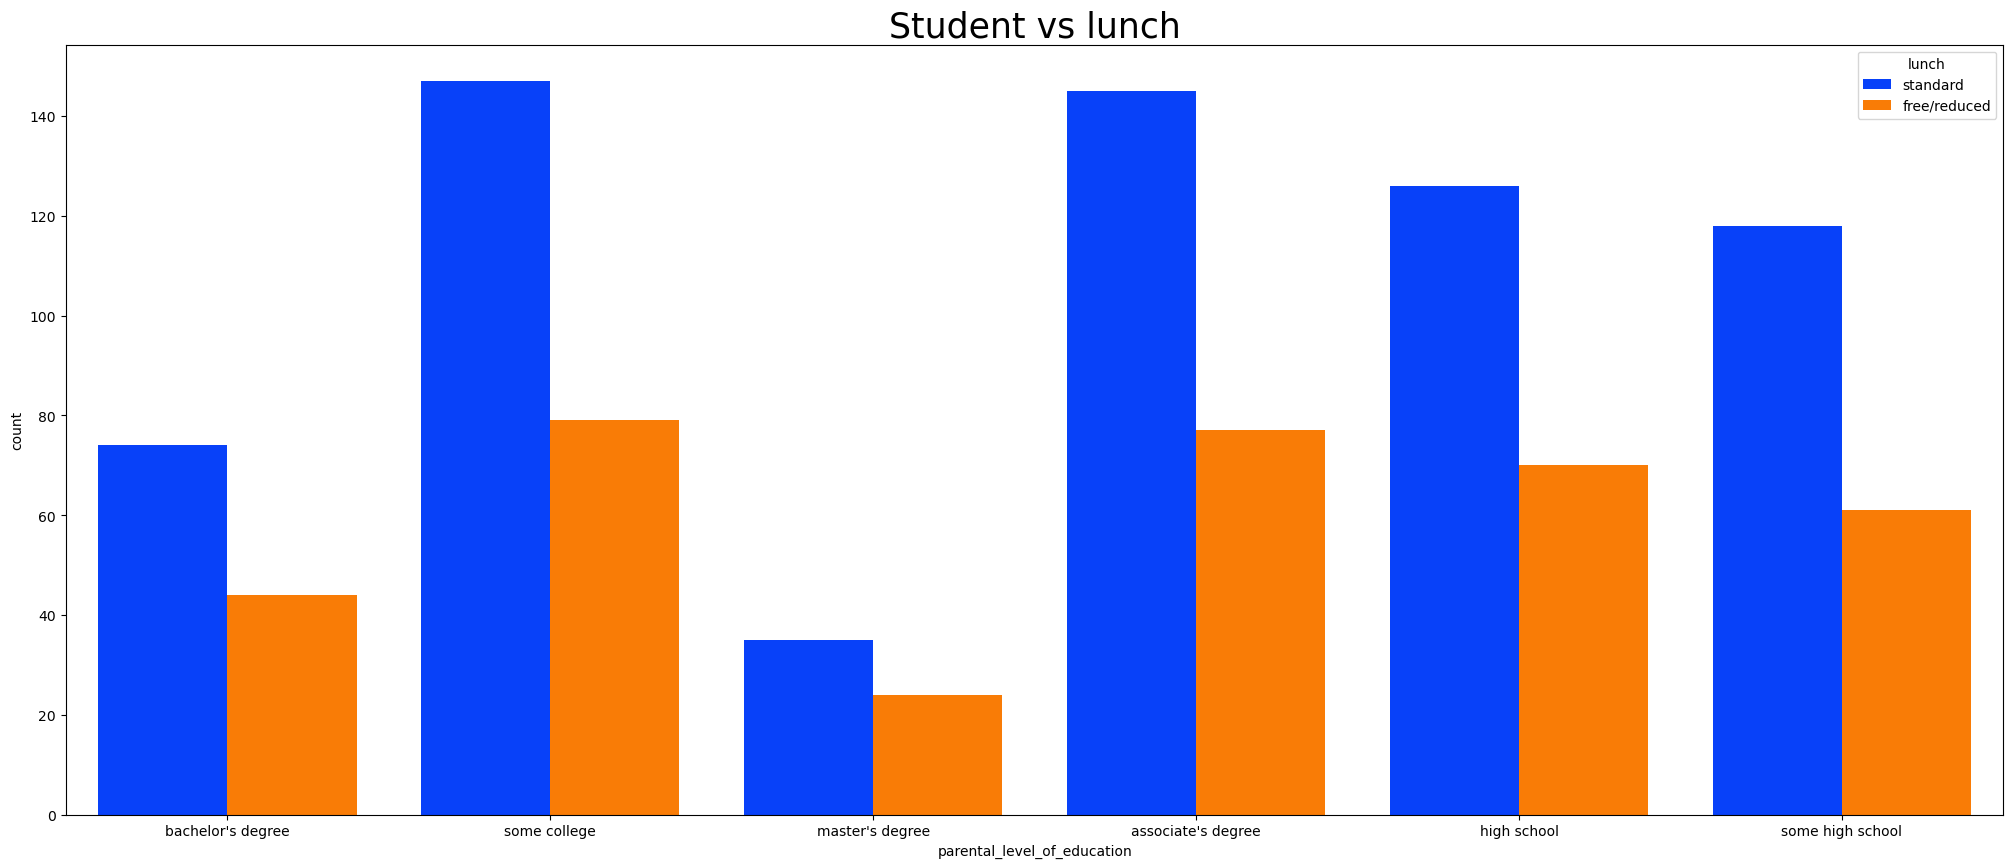

In [65]:
plt.figure(figsize=(25,10))
    
sns.countplot(x=df['parental_level_of_education'],data=df,hue = 'lunch', palette = 'bright',saturation=0.95)
plt.title('Student vs lunch', color ='black', size=25)
plt.show();

### Insights

Students who were served standard lunch tends to perform better in comparison with free/reduced lunch

### 4.4.5 Test Preparation Course

* Which type of test_preparation_course is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

### UNIVARIATE Analysis

* Which type of lunch is most common amoung students ?

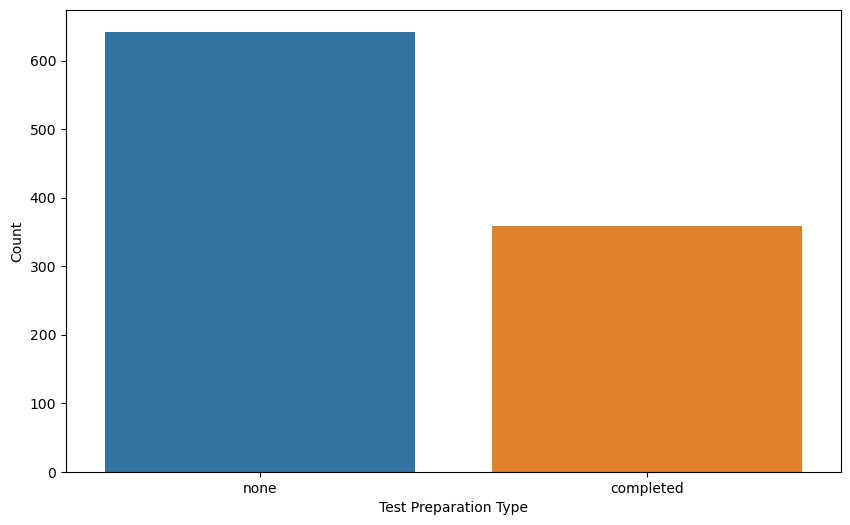

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['test_preparation_course'])
plt.xlabel('Test Preparation Type')
plt.ylabel('Count')
plt.show();

### Insights

* Most of the students have not taken any test_preparation_course

### Bivariate Analysis

* Is taking a test_preparation_course plays any impact on student performance ? 

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

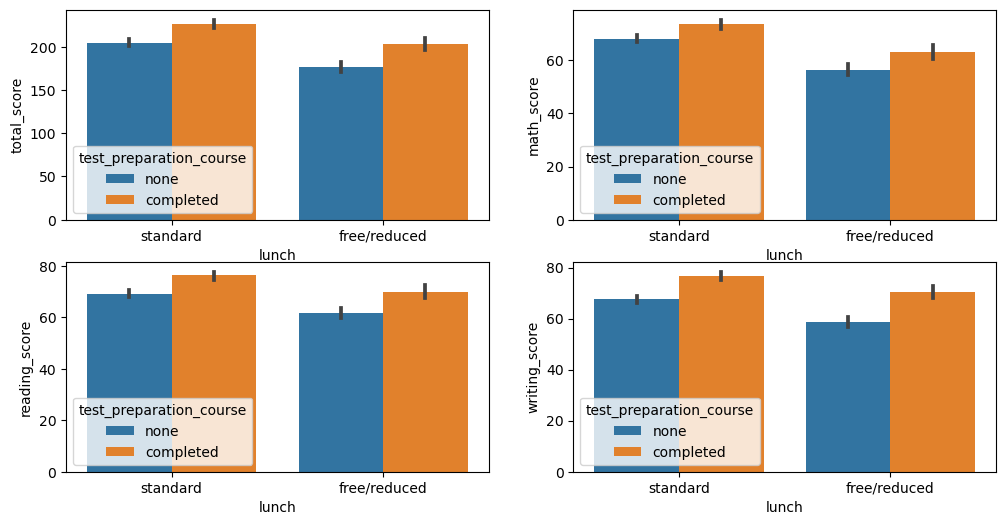

In [75]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['total_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,4)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

### Insights

Students who have taken test_preparation_course tends to perform better who havent taken the course

### Checking Outliers

<AxesSubplot:xlabel='total_score'>

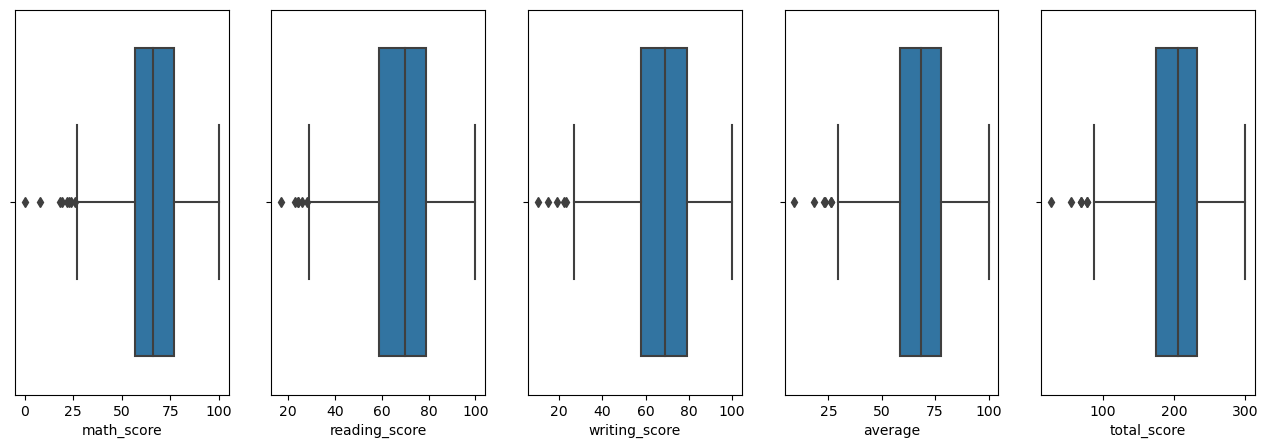

In [78]:
plt.subplots(1, 5, figsize=(16,5))
plt.subplot(151)
sns.boxplot(df['math_score'])
plt.subplot(152)
sns.boxplot(df['reading_score'])
plt.subplot(153)
sns.boxplot(df['writing_score'])
plt.subplot(154)
sns.boxplot(df['average'])
plt.subplot(155)
sns.boxplot(df['total_score'])

### Multivariate Analysis using Pairplot

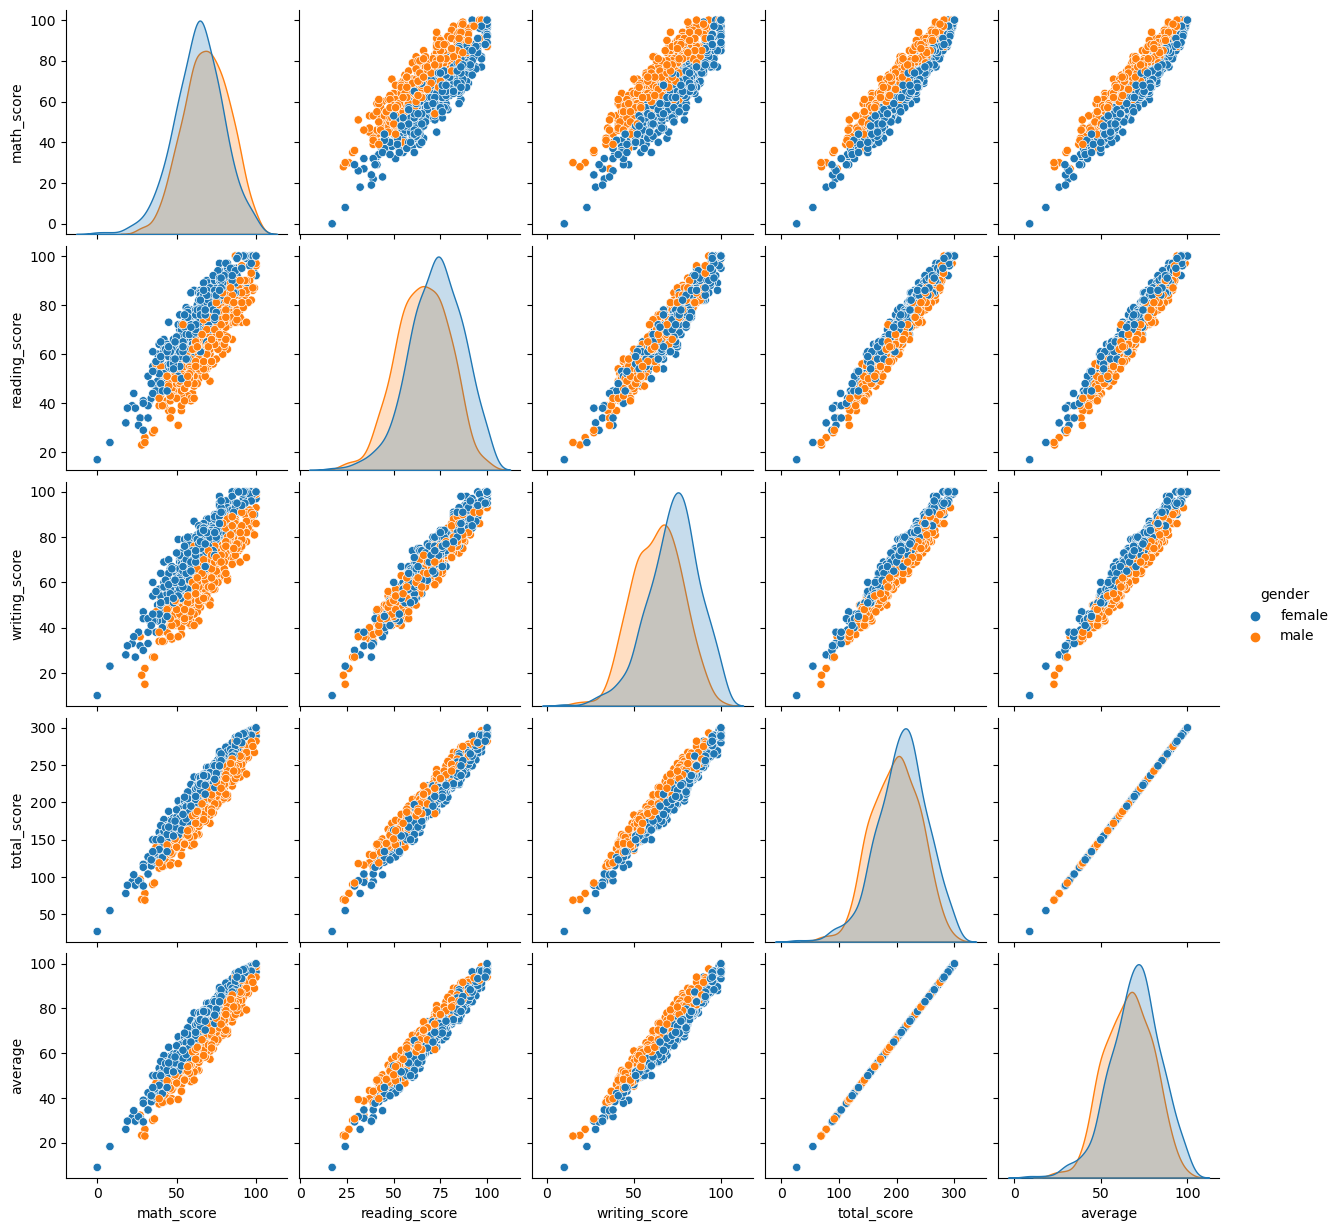

In [82]:
sns.pairplot(df, hue='gender')

### Insights

From the above plot it is clear that all the scores increase linearly with each other

### Conclusions

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial